<a href="https://colab.research.google.com/github/Srinikshith/Codsoft/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit** **Card** **Fraud** **Detection** **using** **Logistic** **Regression**






Credit card fraud detection is the process of identifying and preventing fraudulent credit card transactions. Fraudulent transactions can be made in person, online, or over the phone.

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd


In [ ]:
# Reading the training and testing datasets
df= pd.read_csv('/content/fraudTrain.csv')
df_2 = pd.read_csv('/content/fraudTest.csv')

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
df_2.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
# Combining the train and test datasets for data cleaning and data visulization
merge= pd.concat([df, df_2], axis = 0)
merge.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1856298 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    float64
 13  lat                    float64
 14  long                   float64
 15  city_pop               float64
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              float64
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

In [ ]:
# Resetting the index
merge.reset_index(inplace = True)
merge.head(10)

,index,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
5,5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,...,40.3750,-75.2045,2158.0,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1.325376e+09,40.653382,-76.152667,0.0
6,6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,...,37.9931,-100.9893,2691.0,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1.325376e+09,37.162705,-100.153370,0.0
7,7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,...,38.8432,-78.6003,6018.0,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1.325376e+09,38.948089,-78.540296,0.0
8,8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,...,40.3359,-79.6607,1472.0,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1.325376e+09,40.351813,-79.958146,0.0
9,9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,...,36.5220,-87.3490,151785.0,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1.325376e+09,37.179198,-87.485381,0.0


In [ ]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856298 entries, 0 to 1856297
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   index                  int64  
 1   Unnamed: 0             int64  
 2   trans_date_trans_time  object 
 3   cc_num                 int64  
 4   merchant               object 
 5   category               object 
 6   amt                    float64
 7   first                  object 
 8   last                   object 
 9   gender                 object 
 10  street                 object 
 11  city                   object 
 12  state                  object 
 13  zip                    float64
 14  lat                    float64
 15  long                   float64
 16  city_pop               float64
 17  job                    object 
 18  dob                    object 
 19  trans_num              object 
 20  unix_time              float64
 21  merch_lat              float64
 22  merch_long        

In [ ]:
# Checking for duplicate values
merge.duplicated().sum()

0

In [ ]:
# Checking for null values
merge.isnull().sum()

index                    0
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
merge= merge.drop(['index', 'Unnamed: 0'], axis = 1)

In [ ]:
merge.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.856298e+06,1.856298e+06,1.856298e+06,1.856298e+06,1.856297e+06,1.856297e+06,1.856297e+06,1.856297e+06,1.856297e+06,1.856297e+06
mean,4.173813e+17,7.006686e+01,4.881399e+04,3.853944e+01,-9.022884e+01,8.864899e+04,1.358605e+09,3.853912e+01,-9.022896e+01,5.217915e-03
std,1.309108e+18,1.591904e+02,2.688263e+04,5.072109e+00,1.375005e+01,3.015058e+05,1.823858e+07,5.106167e+00,1.376186e+01,7.204645e-02
min,6.041621e+10,1.000000e+00,-9.767683e+01,0.000000e+00,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.342948e+09,3.474033e+01,-9.689996e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.356984e+09,3.936890e+01,-8.744097e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374533e+09,4.195617e+01,-8.024483e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


**Data** **visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

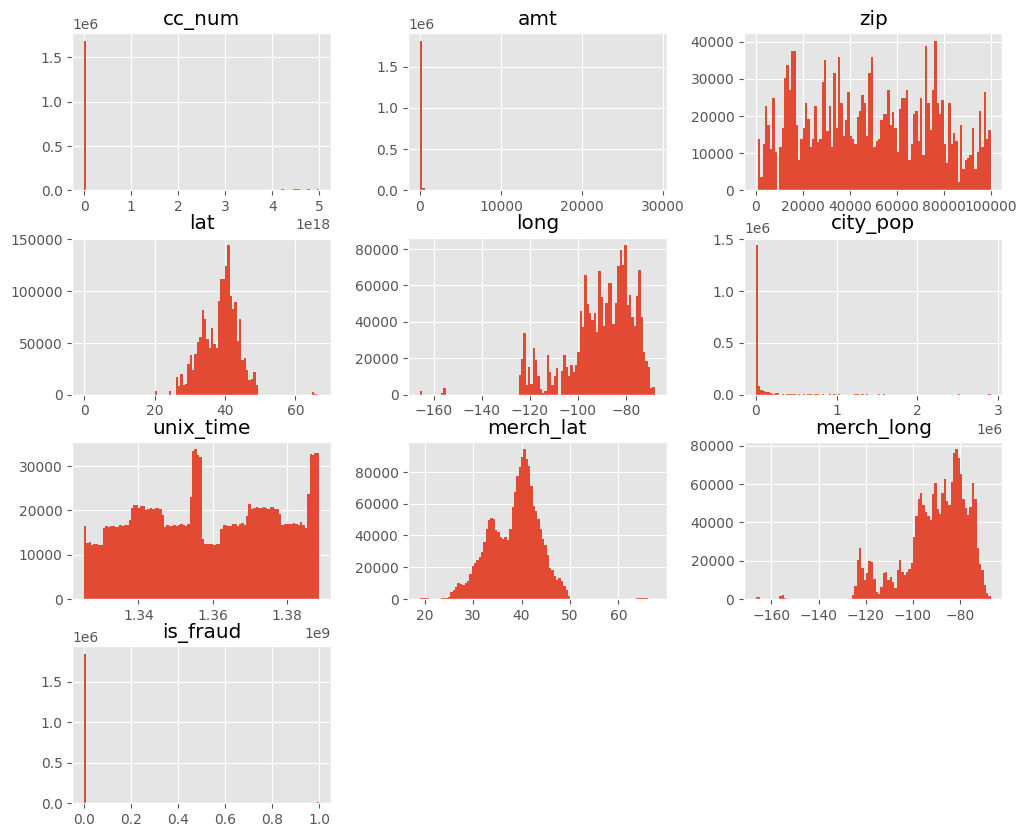

In [ ]:
merge.hist(bins=100, figsize=(12,10))
plt.show()

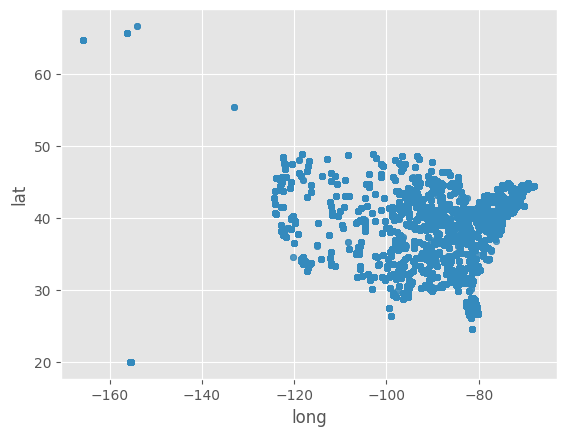

In [ ]:
merge.plot(kind="scatter", x = "long", y= "lat", grid=True, alpha = 0.2)
plt.show()

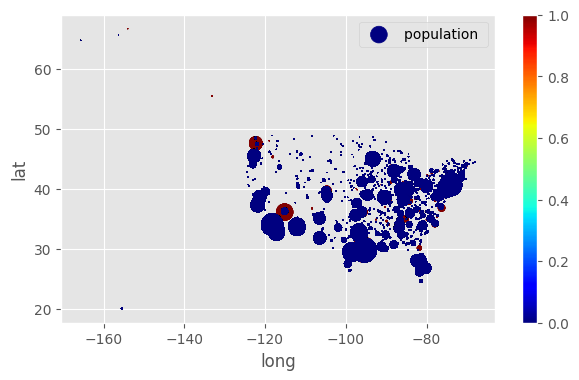

In [ ]:
merge.plot(kind = "scatter", x = "long", y= "lat", grid =  True,
             s = merge['city_pop']/10000, label = "population ",
             c  =merge.is_fraud, colormap="jet", colorbar=True,
             legend= True, sharex=False, figsize=(7,4)
             )
plt.show()

<Axes: xlabel='is_fraud', ylabel='count'>

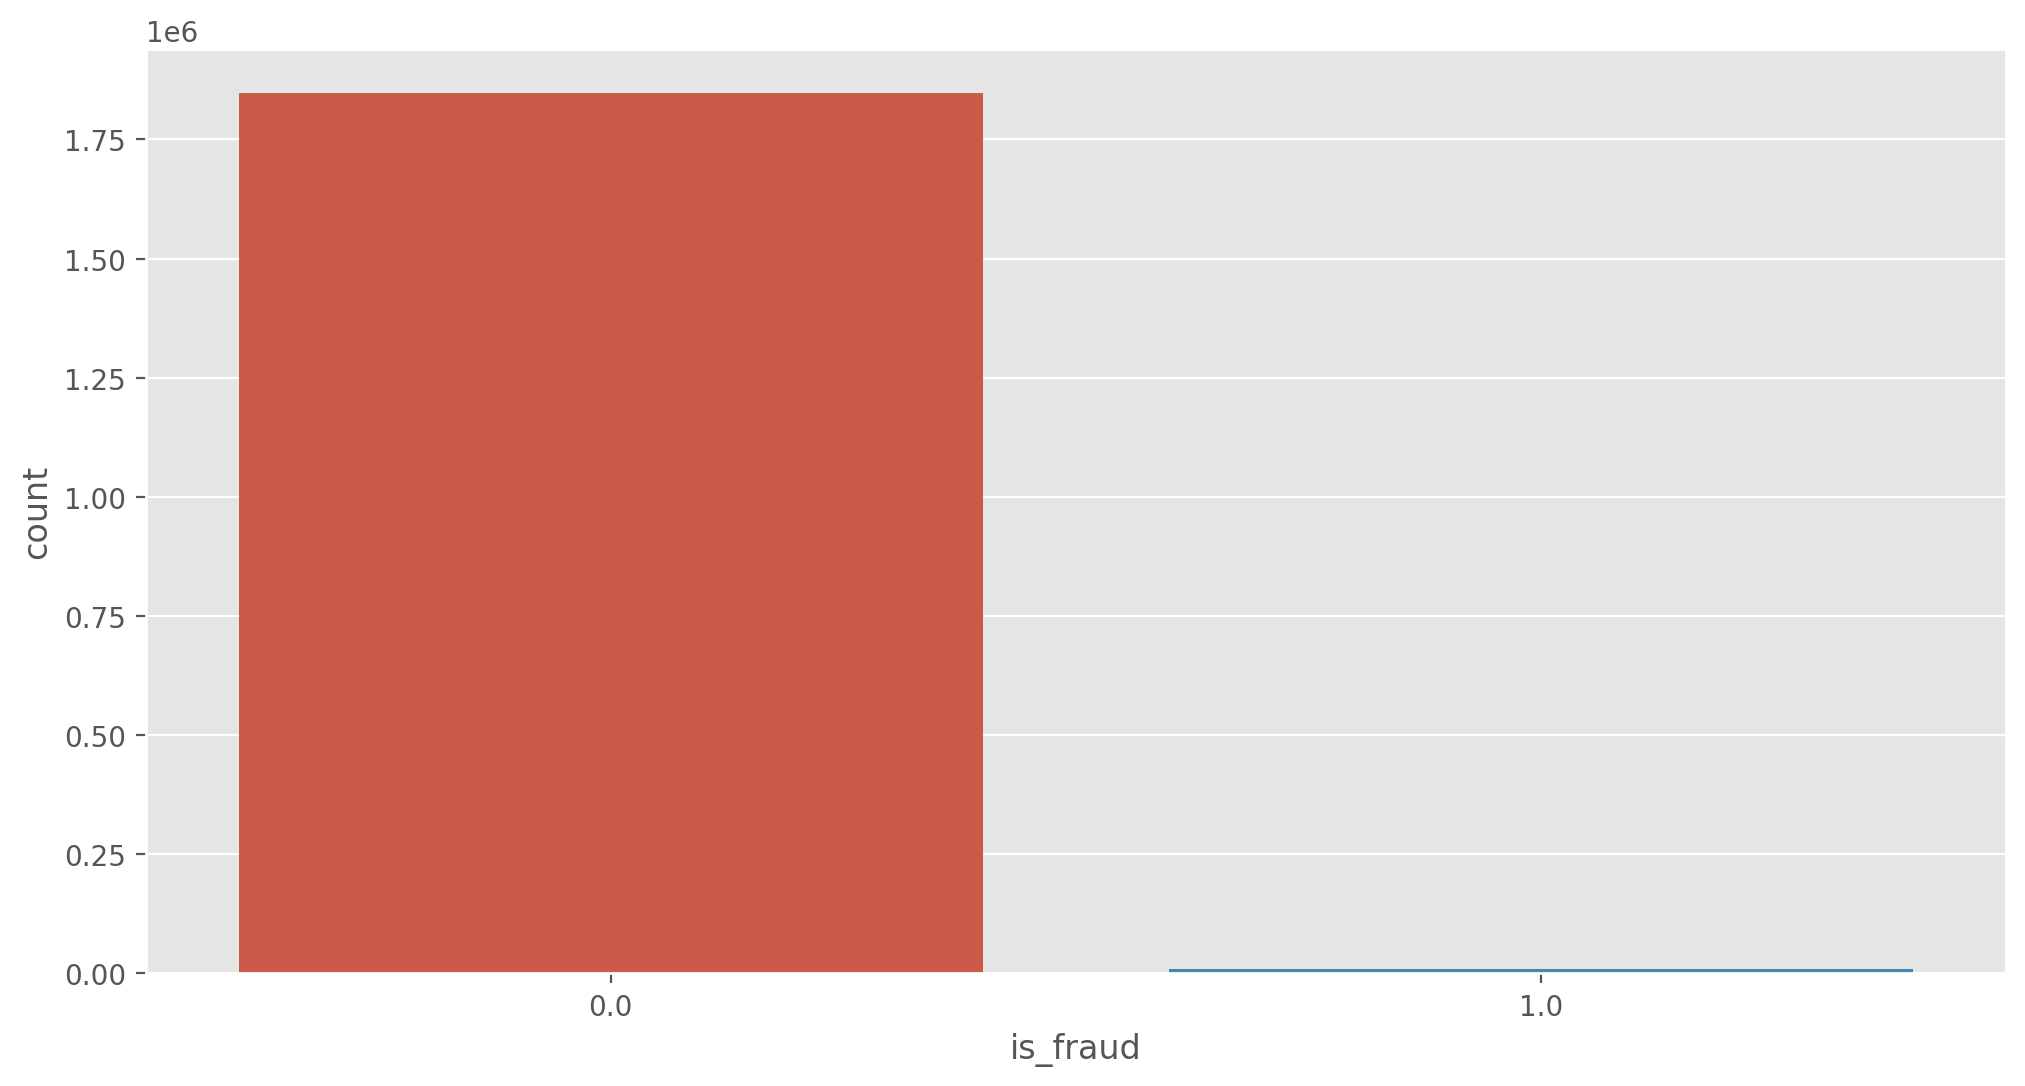

In [ ]:
plt.figure(figsize = (12,6), dpi = 200)
sns.countplot(x = merge['is_fraud'])

<Axes: xlabel='gender', ylabel='count'>

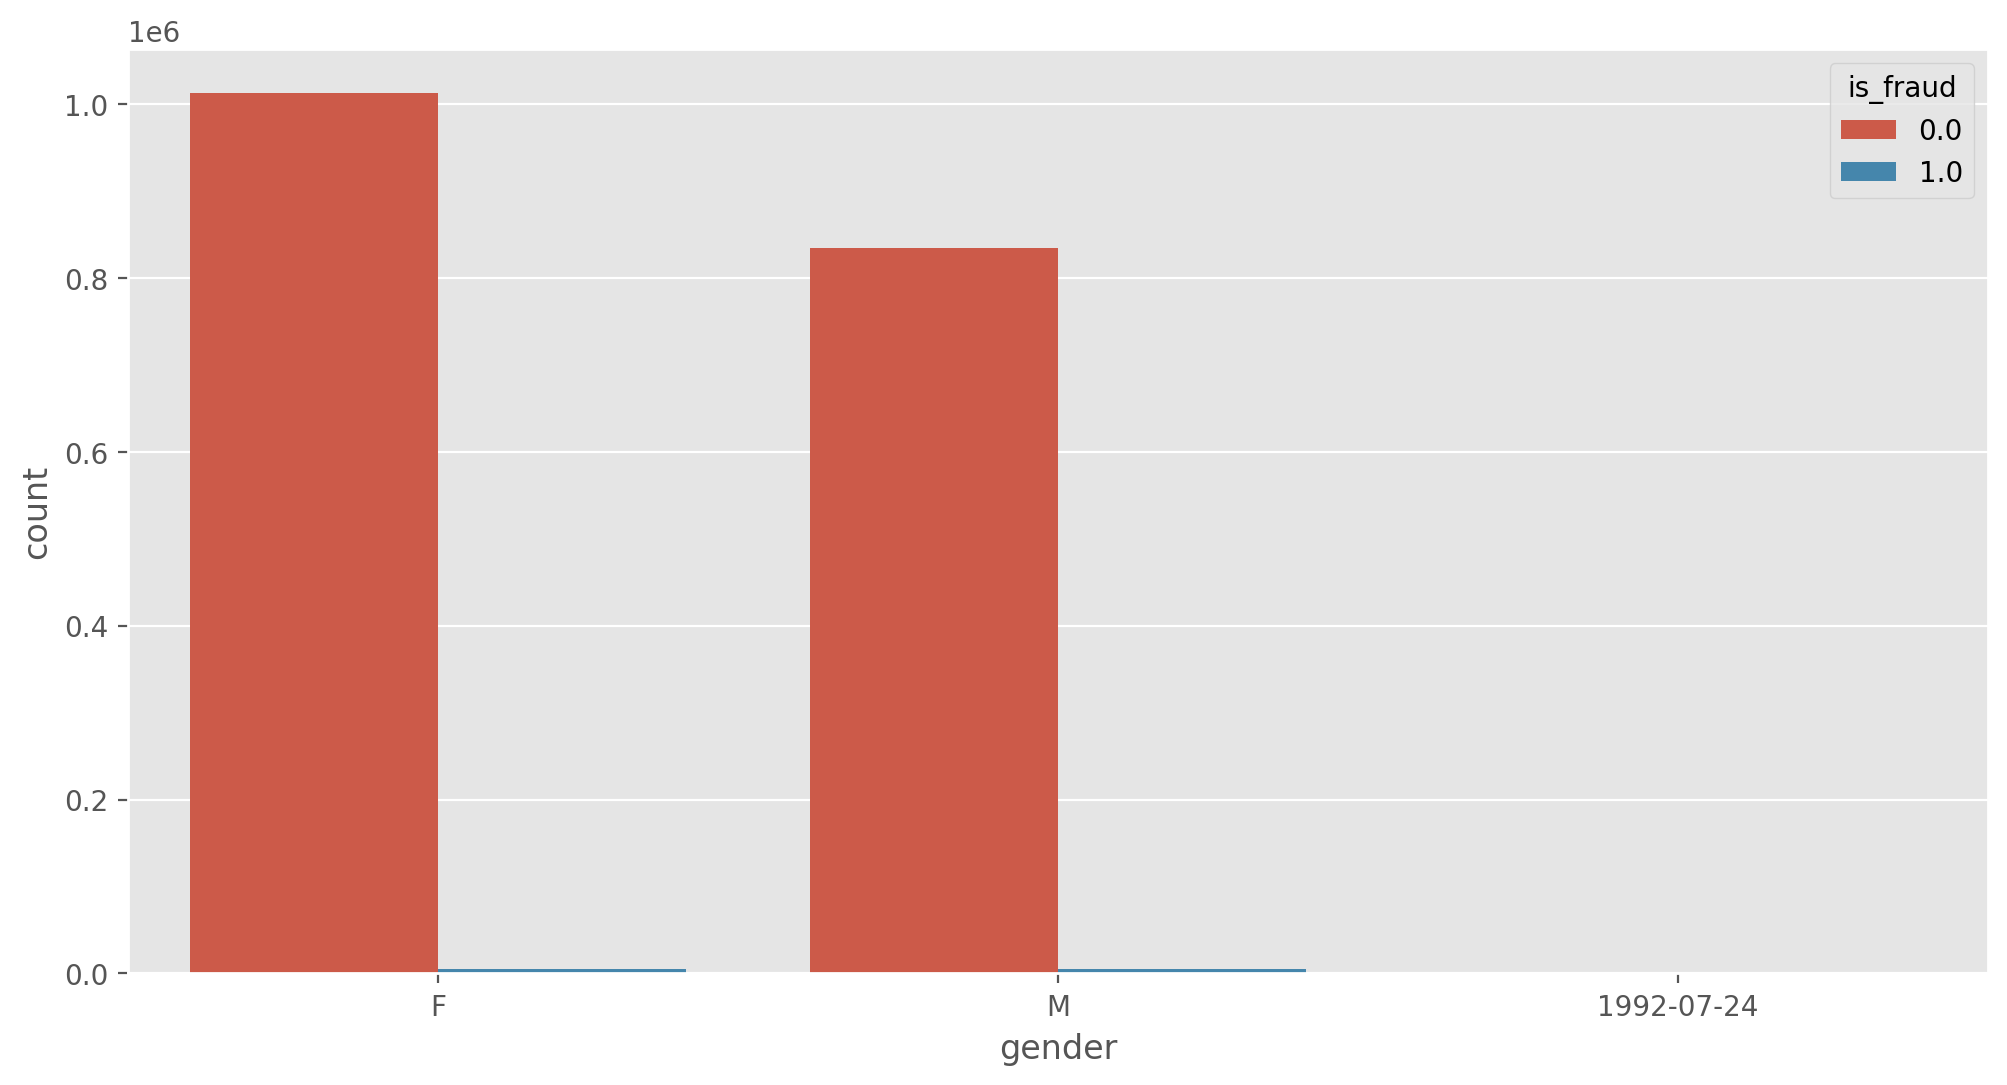

In [ ]:
plt.figure(figsize = (12,6), dpi = 200)
sns.countplot(x = 'gender', hue = 'is_fraud', data = merge)

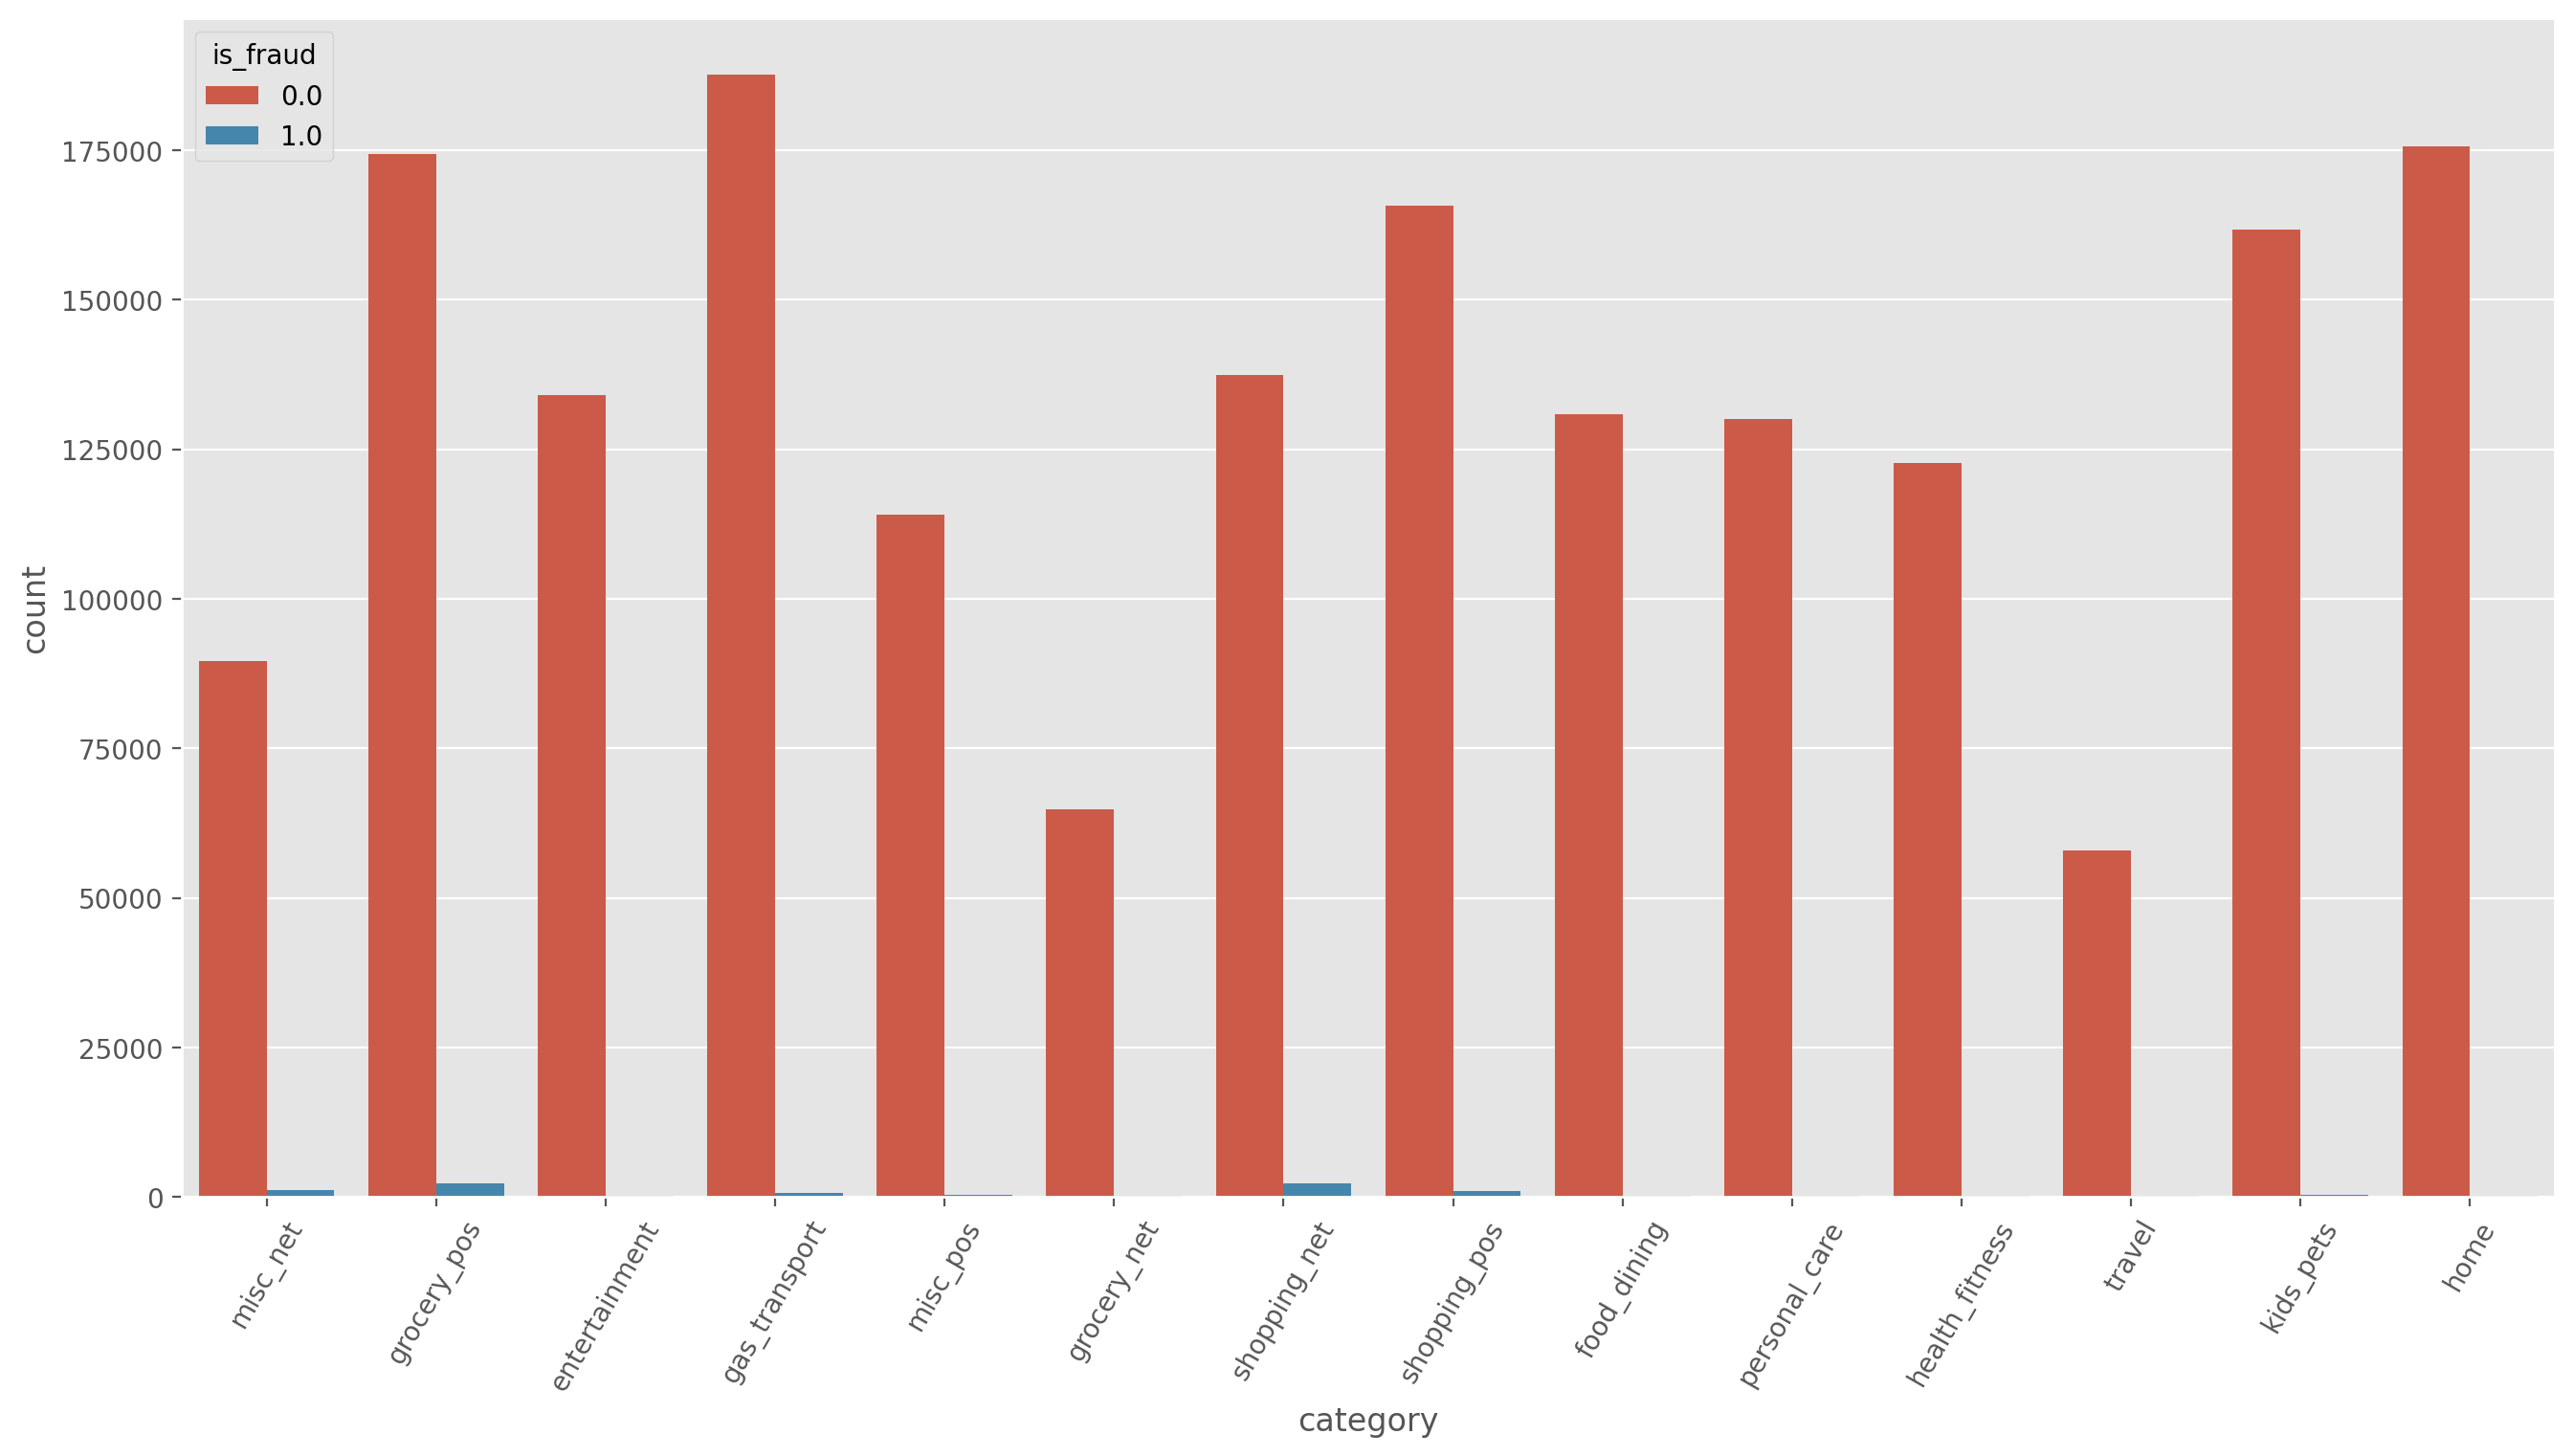

In [ ]:
plt.figure(figsize = (16, 8), dpi = 200)
sns.countplot(x = 'category', hue = 'is_fraud', data = merge)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
merge.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


tf-idf

In [ ]:
# Creating dependent and independent features dataset
X = merge.drop(['is_fraud'], axis = 1)
Y = merge['is_fraud']

In [ ]:
# Encoding the categorical columns
from sklearn.preprocessing import OrdinalEncoder
cols = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
        'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
encoder = OrdinalEncoder()
X[cols] = encoder.fit_transform(X[cols])

In [ ]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
Y = merge[['is_fraud']].values

In [ ]:
print('Independent Features Shape : ' , X.shape)
print('Dependent Features Shape   : ',Y.shape)

Independent Features Shape :  (1856298, 21)
Dependent Features Shape   :  (1856298, 1)


In [ ]:
merge['is_fraud'].value_counts()

0.0    1846611
1.0       9686
Name: is_fraud, dtype: int64

In [ ]:
# Assuming Y is a 2D numpy array, and you want to select column 0
# You can extract the desired column using indexing
Y_column = Y[:, 0]

# Convert Y_column to a pandas Series for calculating class distribution
Y_series = pd.Series(Y_column)




In [ ]:
# Assuming Y is a pandas Series
# You can directly use Y as the target variable for calculating class distribution
Y_series = Y


In [ ]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import NearMiss

# Assuming X and Y are your feature matrix and target variable
# Ensure X and Y are in the correct format and have the appropriate dimensions

# Check for NaN values in Y
nan_indices = pd.isnull(Y)

# Handle missing values in Y (if needed)
# For example, if you want to remove rows with NaN values in Y:
X_filtered = X[~nan_indices.flatten()]
Y_filtered = Y[~nan_indices.flatten()]

# Convert Y_filtered to a 1-dimensional numpy array
Y_column = Y_filtered.flatten()

# Convert Y_column to a pandas Series for calculating class distribution
Y_series = pd.Series(Y_column)

# Check the class distribution before undersampling
print("Class distribution before undersampling:")
print(Y_series.value_counts())

# Create an instance of NearMiss
nm_sampler = NearMiss()

# Use fit_resample method to perform the undersampling on your data
x_sampled, y_sampled = nm_sampler.fit_resample(X_filtered, Y_column)

# Convert y_sampled to a pandas Series for calculating class distribution after undersampling
y_sampled_series = pd.Series(y_sampled)

# Check the class distribution after undersampling
print("Class distribution after undersampling:")
print(y_sampled_series.value_counts())

# Now you can proceed with the rest of your analysis using x_sampled and y_sampled.


Class distribution before undersampling:
0.0    1846611
1.0       9686
dtype: int64
Class distribution after undersampling:
0.0    9686
1.0    9686
dtype: int64


In [ ]:
# Splitting the  sampled datasets into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size = 0.2, random_state = 2)

In [ ]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (15497, 21)
Training Labels Shape :  (15497,)
Testing Data Shape    :  (3875, 21)
Testing Labels Shape  :  (3875,)


**Logistic** **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Prediction on training and testing sets and checking their accuracy scores
pred_train = model.predict(x_train)
pred_test  = model.predict(x_test)
pred_train


array([1., 1., 1., ..., 1., 0., 0.])

In [ ]:
model.score(x_train,y_train)

0.8093824611215074

In [ ]:
model.coef_

array([[ 6.64580076e-01,  8.27972590e-02, -3.67967568e-01,
        -7.76669679e-01,  4.05329191e+01, -8.50344618e-02,
         8.07330550e-02,  2.37763494e-01,  9.59038654e-02,
        -1.01083737e-01, -7.24020287e-02, -3.42615181e-02,
        -6.53952204e-02, -1.26525289e-01,  1.27131096e+00,
        -5.60173898e-02, -5.50559445e-01, -1.23127898e-01,
        -7.92478960e-01, -4.56137287e-01, -1.07483487e-01]])

In [ ]:
model.intercept_

array([0.91842937])

In [ ]:

print(confusion_matrix(y_train,pred_train))


[[6665 1133]
 [1821 5878]]


In [ ]:
print(confusion_matrix(y_test,pred_test))

[[1623  265]
 [ 498 1489]]


In [ ]:
print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.8093824611215074
Testing  Accuracy :  0.8030967741935484


In [ ]:
# Checking f1 score, precision and recall
print('Training Set f1 score : ', f1_score(y_train, pred_train))
print('Testing  Set f1 score : ', f1_score(y_test, pred_test))
print()
print('Test set precision : ', precision_score(y_test, pred_test))
print('Test set recall    : ', recall_score(y_test, pred_test))

Training Set f1 score :  0.7991842284160434
Testing  Set f1 score :  0.7960438385458433

Test set precision :  0.8489167616875712
Test set recall    :  0.7493709109209864


In [ ]:
print('accuracy_train is---->',round(accuracy_score(y_train,pred_train)*100,2))

accuracy_train is----> 80.94


In [ ]:
print('accuracy_test is--->',round(accuracy_score(y_test,pred_test)*100,2))

accuracy_test is---> 80.31
